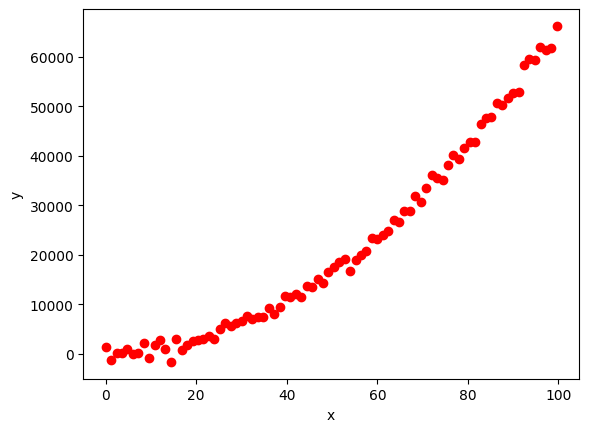

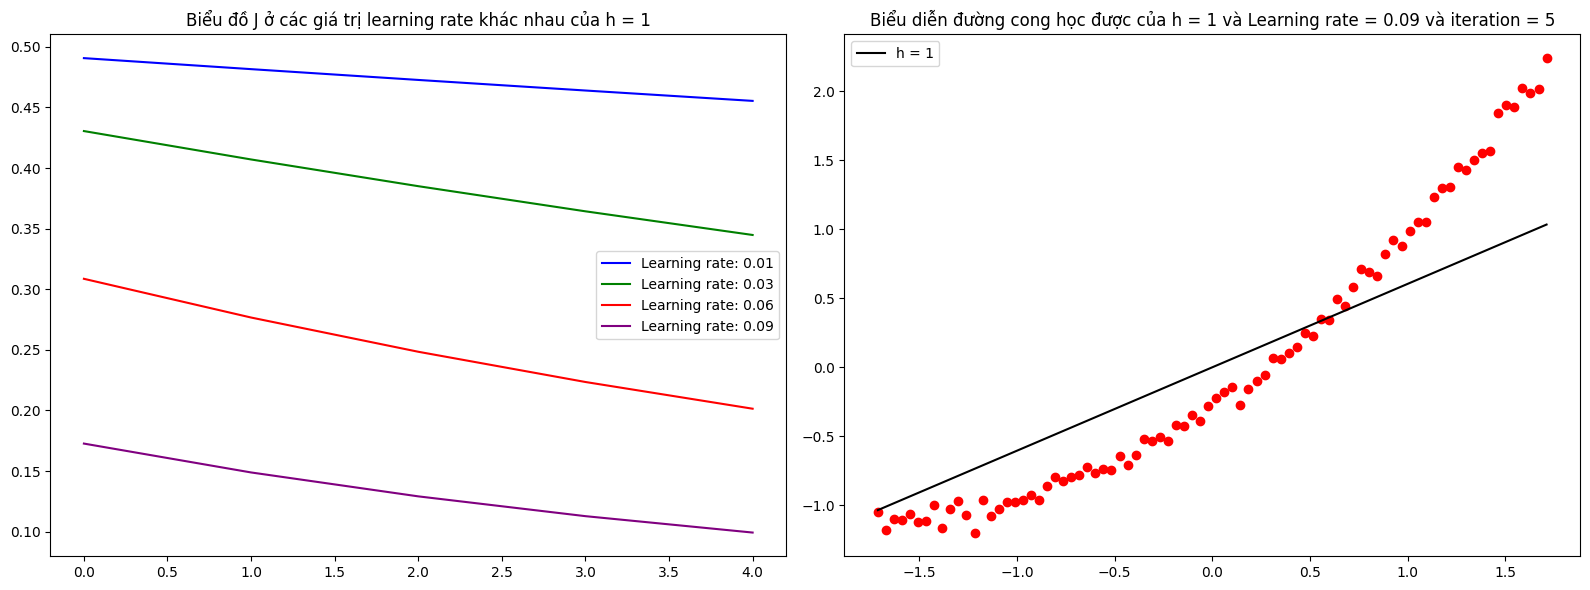

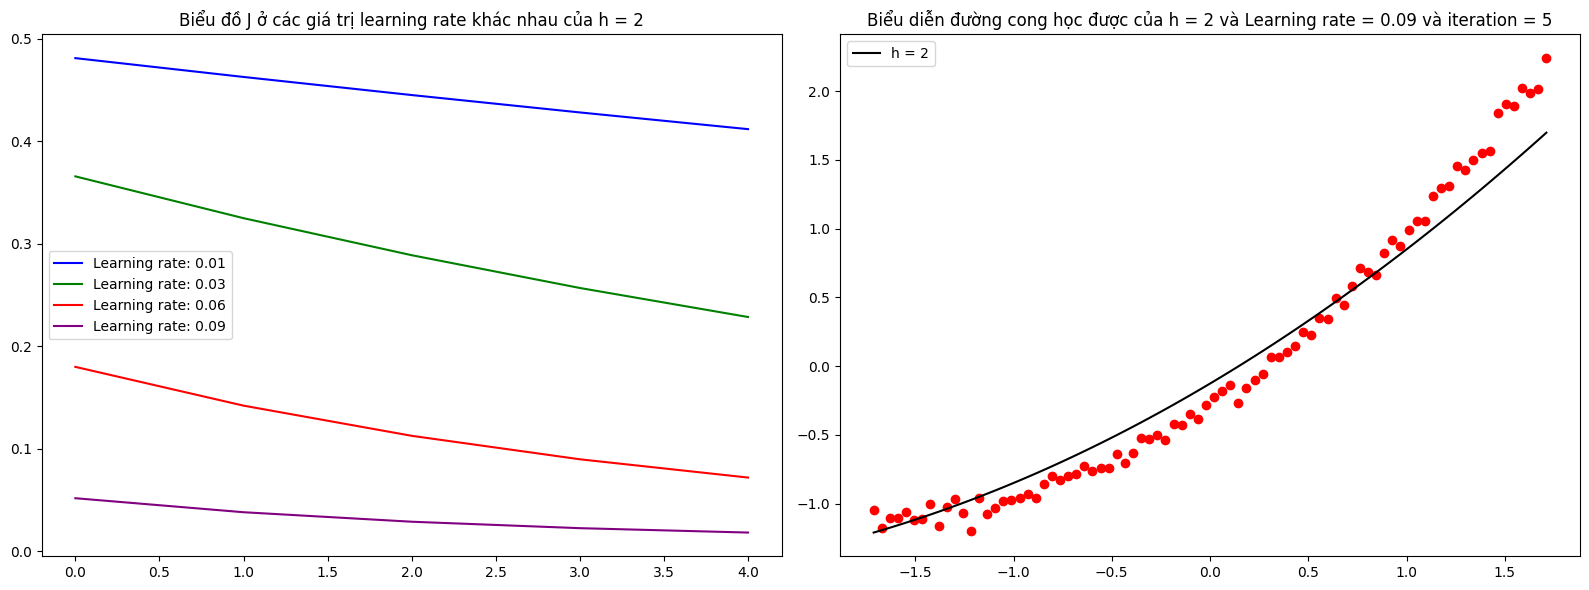

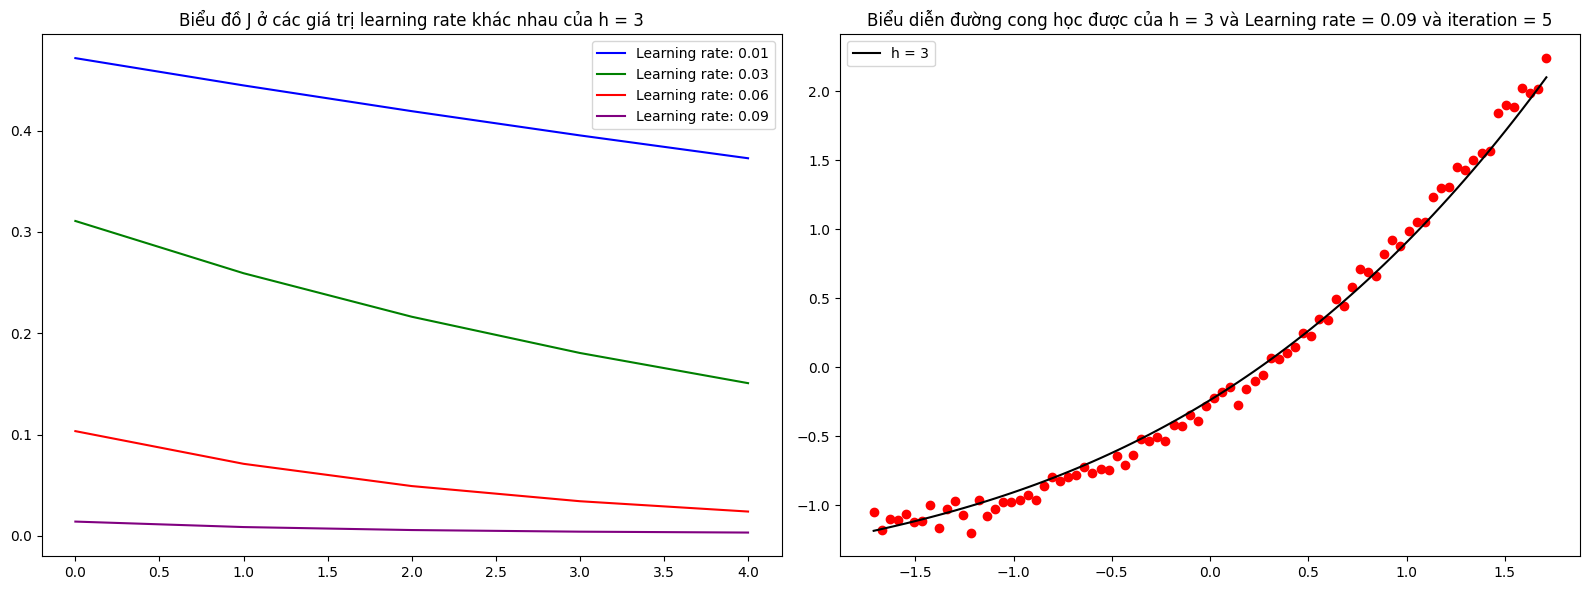

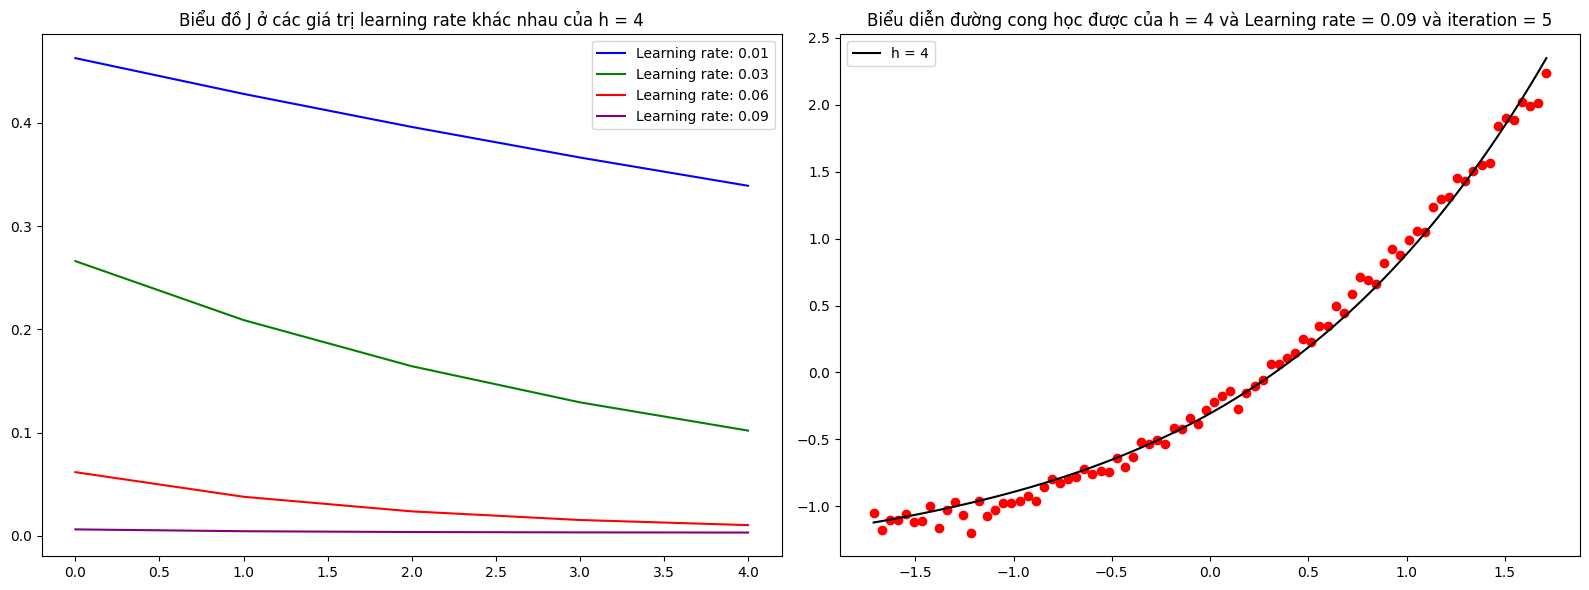

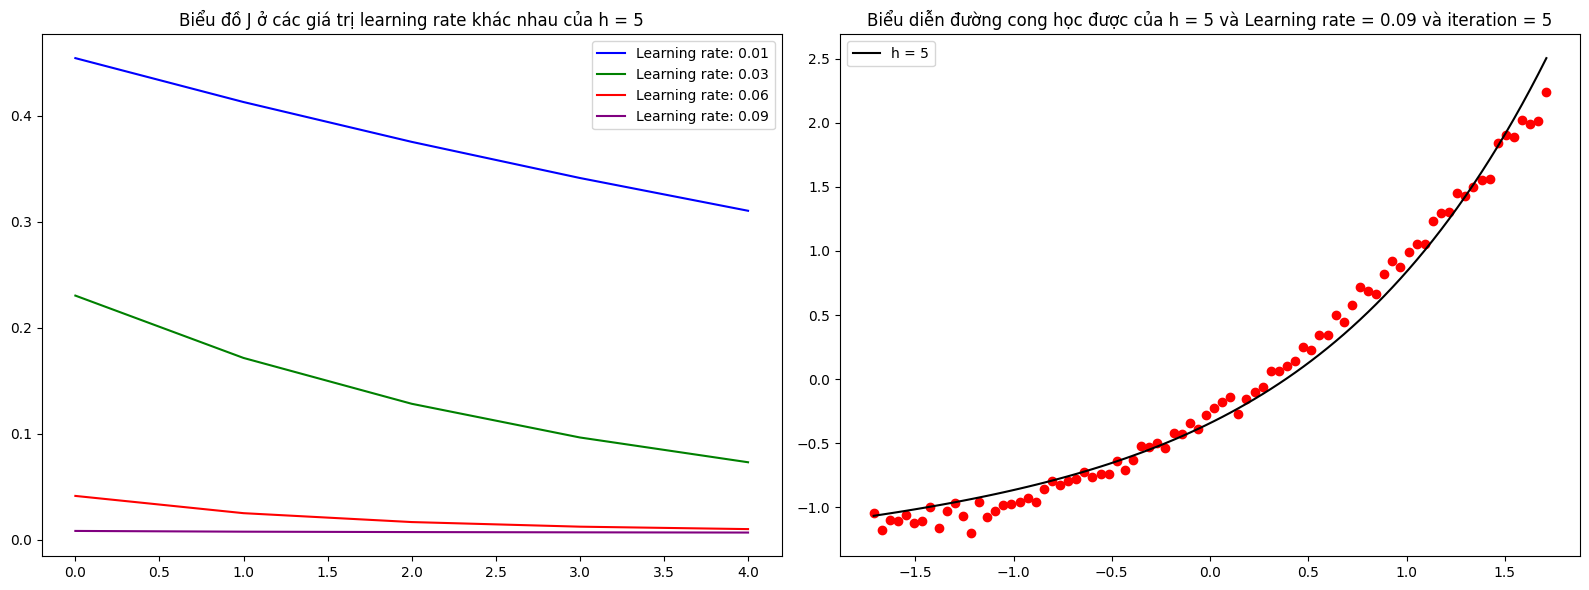

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data loading
data = pd.read_csv('polynomial.csv')
m = len(data)
x = data['x'].values.reshape(m,1)
y = data['y'].values.reshape(m,1)

# Visualize data

plt.scatter(x,y,color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Normailize data
def normalize_data(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    normalized_data = (x - mean) / std
    return normalized_data 

x_norm = normalize_data(x)
y = normalize_data(y)
# Hàm Gradient descent
def gradient_descent(X, y, theta, alpha, iteration):
    m = len(y)
    J_history = np.zeros((iteration, 1))

    for i in range(iteration):
        theta = theta - (alpha/m) * (X.T @ (X @ theta - y))
        J_history[i] = compute_cost(X, y, theta)
        # print('Đang train iteration thứ :',i+1)

    return theta, J_history

# Hàm tính Cost J 
def compute_cost(X, y, theta):
    m = len(y)
    J = (1/(2*m)) * np.sum((X @ theta - y)**2)
    return J


# Define the list of h values
h_values = [1, 2, 3, 4, 5]

# Iterate over each h value
for h in h_values:
    fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16, 6))
    # Update x_poly to include polynomial features up to h
    x_poly = x
    for i in range(2, h+1):
        x_poly = np.hstack((x_poly, x**i))
    x_poly = normalize_data(x_poly)
    x_poly = np.hstack((np.ones((m, 1)), x_poly))

    # Perform gradient descent
    theta = np.zeros((x_poly.shape[1], 1))
    learning_rates = [0.01, 0.03, 0.06, 0.09]
    colors = ['blue', 'green', 'red', 'purple']
    iteration = 5

    for i, alpha in enumerate(learning_rates):
        theta, J_history = gradient_descent(x_poly, y, theta, alpha, iteration)
        ax1.plot(J_history, color=colors[i], label=f'Learning rate: {alpha}')
        ax1.set_title(f'Biểu đồ J ở các giá trị learning rate khác nhau của h = {h}')
        
    ax1.legend()
    

    ax2.scatter(x_norm, y, color = 'red')
    ax2.plot(x_norm, x_poly @ theta, color='black', label=f'h = {h}')
    ax2.set_title(f'Biểu diễn đường cong học được của h = {h} và Learning rate = {alpha} và iteration = {iteration}')
    ax2.legend()
    plt.tight_layout()
    plt.show()    



